# Testing Image Segmentation Heuristic

* Using OpenCV's watershed + countour detection. 

In [1]:
%matplotlib inline
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import imutils

In [251]:
img_list = [['JPEG_20160624_150543_1000970941596.png',163,398,158,414],
['JPEG_20160712_105246_1000811050259.png',128,576,132,374],
['JPEG_20160810_135527_1000471088779.png',250,418,61,451],
['148053427912520161126_210123.png',149,477,75,408],
['147771810022720161028_154644.png',53,556,31,480],
['1473315135061DeeplearnS11530.png',79,564,154,333],
['147772389177420161028_165901.png',43,628,83,439],
['147771736206820161025_155603.png',104,520,155,348],
['JPEG_20161129_174217_100049026537.png',0,640,0,480],
['JPEG_20160724_122712_1000885812239.png',8,634,110,429],
['JPEG_20161202_181717_1000754821075.png',110,534,114,327],
['1475318841027wine-only-one-velvet-midi-bodycon-dress.png',0,0,0,0],
['147443966874811470116771101-Roadster-Navy-Sweater-7391470116770952-4.png',1,640,149,364],
['JPEG_20161123_180448_1000929053034.png',26,618,101,380]]


im = 13


img_name = img_list[im][0]
# img_path = os.path.join('X:/Flipkart GRID - Object Localization (Medium Complexity Round)/idea-testing/', img_name)
img_data_path = 'X:/Flipkart GRID - Object Localization (Medium Complexity Round)/orig_data/data/images'
img_path = os.path.join(img_data_path, img_name)
print(img_path)

X:/Flipkart GRID - Object Localization (Medium Complexity Round)/orig_data/data/images\JPEG_20161123_180448_1000929053034.png


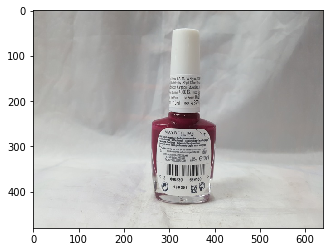

In [264]:
img = cv2.imread(img_path)
shifted = cv2.pyrMeanShiftFiltering(img, 0, 40) #1> 21, 51 #2> 0, 40
# cv2.imshow("Input", img)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

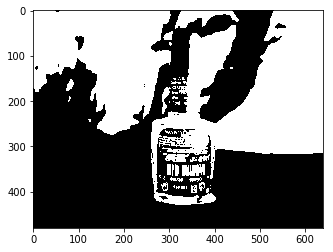

In [280]:
# convert the mean shift image to grayscale, then apply
# Otsu's thresholding
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# cv2.imshow("Thresh", thresh)
plt.imshow(thresh, cmap='gray')

In [274]:
area_threshold = 1200

# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# for c in cnts[1]:
#     cnt_area = cv2.findArea(c)
#     if(c < area_thres)
# print(np.array_equal(cnts[0], thresh))
# print(type(cnts[0]))
# print(type(cnts[1]))
# print(type(cnts[2]))
# res_cnts = []
# # print(cnts)
# # print(type(cnts))
# for c in cnts[1]:
#     if cv2.contourArea(c) > area_threshold:
#         res_cnts.append()

# cnts = tuple(res_cnts)
res_cnts = []
contours = imutils.grab_contours(cnts)
print("[INFO] {} unique contours found".format(len(contours)))
 
# loop over the contours
for (i, c) in enumerate(contours):
    ((x, y), _) = cv2.minEnclosingCircle(c)
    cnt_area = cv2.contourArea(c)
    if cnt_area < area_threshold:
        # cv2.putText(img, "#{}".format(i + 1), (int(x) - 10, int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
        # cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
        res_cnts.append(c)

# show the output image
# cv2.imshow("Image", image)
# plt.figure(figsize=(20, 20))
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

[INFO] 251 unique contours found


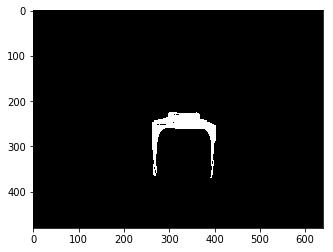

In [275]:
cnt = cnts[0]
for c in res_cnts:
    cv2.fillPoly(cnt, [c], (0, 0, 0))
plt.imshow(cnt, cmap='gray')

In [276]:
M = cv2.moments(cnt)
print(M)

{'m00': 1458855.0, 'm10': 479426265.0, 'm01': 386000130.0, 'm20': 160677273525.0, 'm11': 126708528450.0, 'm02': 103658984100.0, 'm30': 54867389459625.0, 'm21': 42474469186140.0, 'm12': 33982934258280.0, 'm03': 28303818382020.0, 'mu20': 3122517519.8793945, 'mu11': -143420931.8196106, 'mu02': 1526763721.6780396, 'mu30': 11396958396.429688, 'mu21': 54949120495.806274, 'mu12': -6817008366.245789, 'mu03': 68631657937.109375, 'nu20': 0.001467170639283819, 'nu11': -6.738888697495174e-05, 'nu02': 0.0007173772096741452, 'nu30': 4.433621785376355e-06, 'nu21': 2.1376196108059567e-05, 'nu12': -2.6519388552956776e-06, 'nu03': 2.6698949247001706e-05}


In [277]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

(480, 640)


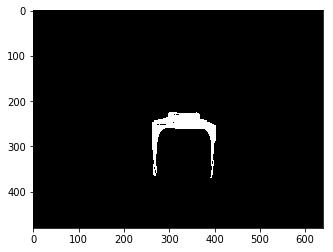

In [278]:
plt.imshow(cnt, cmap='gray')
print(cnt.shape)
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2);

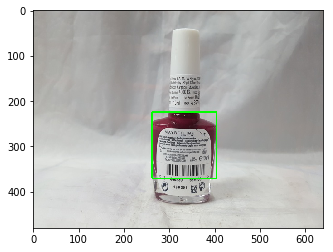

In [279]:
img_for_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_for_plt)

In [231]:
actual_bbox = (img_list[im][1],img_list[im][2],img_list[im][3],img_list[im][4])
x1, x2, y1, y2 = actual_bbox

In [232]:
cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),2);

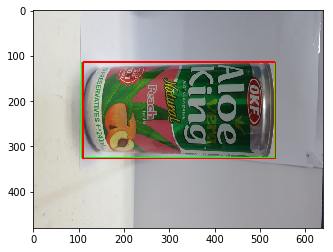

In [233]:
img_for_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_for_plt)

In [234]:
print(((w * h) /  ((x2 - x1) * (y2 - y1))))
print(1/((w * h) /  ((x2 - x1) * (y2 - y1))))

0.9859154929577465
1.0142857142857142
